<a href="https://colab.research.google.com/github/sa-y-an/OMR_Net/blob/main/Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing stuffs
import numpy as np
import gc 
import os
import ctypes
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import LeakyReLU
import pandas as pd

sns.set()

Getting the data set

In [ ]:
!wget https://github.com/sa-y-an/answersheet_data/raw/main/folds.zip 

--2021-05-10 14:24:32--  https://github.com/sa-y-an/answersheet_data/raw/main/folds.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/sa-y-an/answersheet_data/main/folds.zip [following]
--2021-05-10 14:24:32--  https://media.githubusercontent.com/media/sa-y-an/answersheet_data/main/folds.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94507401 (90M) [application/zip]
Saving to: ‘folds.zip’

folds.zip           100%[===================>]  90.13M   345MB/s    in 0.3s    

2021-05-10 14:24:33 (345 MB/s) - ‘folds.zip’ saved [94507401/94507401]



In [ ]:
from zipfile import ZipFile
file_name = "folds.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    #zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

Extracting all the files now...
Done!


In [ ]:
#preparing dataset

import pathlib
data_dir1 = '/content/folds/1'
data_dir2 = '/content/folds/2'
data_dir3 = '/content/folds/3'
data_dir4 = '/content/folds/4'
data_dir5 = '/content/folds/5'

data_dir1 = pathlib.Path(data_dir1)
data_dir2 = pathlib.Path(data_dir2)
data_dir3 = pathlib.Path(data_dir3)
data_dir4 = pathlib.Path(data_dir4)
data_dir5 = pathlib.Path(data_dir5)


batch_size = 32
img_height = 224
img_width = 224

# fetching data from directory

img_ds1=tf.keras.preprocessing.image_dataset_from_directory(
        data_dir1,
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)

img_ds2=tf.keras.preprocessing.image_dataset_from_directory(
        data_dir2,
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)

img_ds3=tf.keras.preprocessing.image_dataset_from_directory(
        data_dir3,
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)
 
img_ds4=tf.keras.preprocessing.image_dataset_from_directory(
        data_dir4,
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)

img_ds5=tf.keras.preprocessing.image_dataset_from_directory(
        data_dir5,
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size) 

# normalizing all the images to a float btw 0 , 2555

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

img_ds1 = img_ds1.map(process)
img_ds2 = img_ds2.map(process)
img_ds3 = img_ds3.map(process)
img_ds4 = img_ds4.map(process)
img_ds5 = img_ds5.map(process)

Found 2040 files belonging to 3 classes.
Found 2040 files belonging to 3 classes.
Found 2040 files belonging to 3 classes.
Found 2040 files belonging to 3 classes.
Found 2040 files belonging to 3 classes.


Custom Activation Function

In [ ]:
# pflu activation function
def pflu_activation(x):
    return x*0.5*(1+(x/(1+x**2)**0.5))

#fpflu actiavtion function
def fpflu_activation(x):
    return tf.math.maximum(x,x/(1+x**2))

In [ ]:
# transfer learning model 
# mobile net V2 model used

feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
!wget https://github.com/sa-y-an/best_omr_models/raw/main/fold1_95_29.h5 
!wget https://github.com/sa-y-an/best_omr_models/raw/main/fold2_95_88.h5 
!wget https://github.com/sa-y-an/best_omr_models/raw/main/fold3_93_97.h5 
!wget https://github.com/sa-y-an/best_omr_models/raw/main/fold4_97_45.h5 
!wget https://github.com/sa-y-an/best_omr_models/raw/main/fold5_97_20.h5 

--2021-05-10 14:24:43--  https://github.com/sa-y-an/best_omr_models/raw/main/fold1_95_29.h5
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/sa-y-an/best_omr_models/main/fold1_95_29.h5 [following]
--2021-05-10 14:24:43--  https://media.githubusercontent.com/media/sa-y-an/best_omr_models/main/fold1_95_29.h5
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22212544 (21M) [application/octet-stream]
Saving to: ‘fold1_95_29.h5’

fold1_95_29.h5      100%[===================>]  21.18M  --.-KB/s    in 0.08s   

2021-05-10 14:24:44 (260 MB/s) - ‘fold1_95_29.h5’ saved [22212544/22212544]

--

In [ ]:
from keras.models import load_model

model1 = load_model('fold1_95_29.h5', custom_objects={'KerasLayer': hub.KerasLayer , 'fpflu_activation' :fpflu_activation , 'pflu_activation' : pflu_activation  })
model2 = load_model('fold2_95_88.h5', custom_objects={'KerasLayer': hub.KerasLayer , 'fpflu_activation' :fpflu_activation , 'pflu_activation' : pflu_activation  })
model3 = load_model('fold3_93_97.h5', custom_objects={'KerasLayer': hub.KerasLayer , 'fpflu_activation' :fpflu_activation , 'pflu_activation' : pflu_activation  })
model4 = load_model('fold4_97_45.h5', custom_objects={'KerasLayer': hub.KerasLayer , 'fpflu_activation' :fpflu_activation , 'pflu_activation' : pflu_activation  })
model5 = load_model('fold5_97_20.h5', custom_objects={'KerasLayer': hub.KerasLayer , 'fpflu_activation' :fpflu_activation , 'pflu_activation' : pflu_activation  })

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

img_ds1 = img_ds1.cache().prefetch(buffer_size=AUTOTUNE)
img_ds2 = img_ds2.cache().prefetch(buffer_size=AUTOTUNE)
img_ds3 = img_ds3.cache().prefetch(buffer_size=AUTOTUNE)
img_ds4 = img_ds4.cache().prefetch(buffer_size=AUTOTUNE)
img_ds5 = img_ds5.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
img_ds5?

In [ ]:
gc.collect()
libc = ctypes.CDLL("libc.so.6") # clearing cache 
libc.malloc_trim(0)

0

95.29411764705883
1944


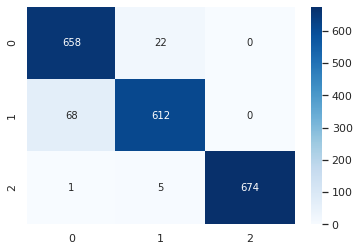

In [ ]:
predictions = []
labels = []
for x, y in img_ds1 :
    predictions = np.concatenate([predictions, np.argmax(model1.predict(x), axis = -1 )])
    labels = np.concatenate([labels, y.numpy()])


cnn = tf.math.confusion_matrix(labels = labels , predictions = predictions )
# print(cnn)
f= np.array(cnn).trace()
print(f/20.40)
print(np.array(cnn).trace())
g = sns.heatmap(cnn , annot = True , cmap = 'Blues' , fmt = 'd')


In [ ]:
gc.collect()
libc = ctypes.CDLL("libc.so.6") # clearing cache 
libc.malloc_trim(0)

0

95.88235294117648
1956


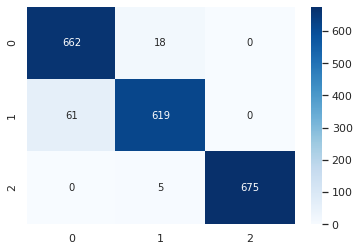

In [ ]:
predictions = []
labels = []
for x, y in img_ds2 :
    predictions = np.concatenate([predictions, np.argmax(model2.predict(x), axis = -1 )])
    labels = np.concatenate([labels, y.numpy()])


cnn = tf.math.confusion_matrix(labels = labels , predictions = predictions )
# print(cnn)
f= np.array(cnn).trace()
print(f/20.40)
print(np.array(cnn).trace())
g = sns.heatmap(cnn , annot = True , cmap = 'Blues' , fmt = 'd')
del predictions, labels, x,y 

93.97058823529413
1917


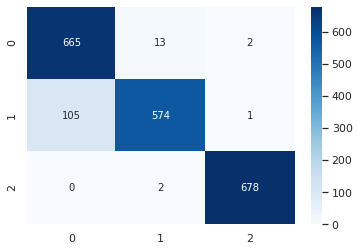

In [ ]:
gc.collect()
libc = ctypes.CDLL("libc.so.6") # clearing cache 
libc.malloc_trim(0)


predictions = []
labels = []
for x, y in img_ds3 :
    predictions = np.concatenate([predictions, np.argmax(model3.predict(x), axis = -1 )])
    labels = np.concatenate([labels, y.numpy()])


cnn = tf.math.confusion_matrix(labels = labels , predictions = predictions )
# print(cnn)
f= np.array(cnn).trace()
print(f/20.40)
print(np.array(cnn).trace())
g = sns.heatmap(cnn , annot = True , cmap = 'Blues' , fmt = 'd')
del predictions, labels, x,y 

97.45098039215686
1988


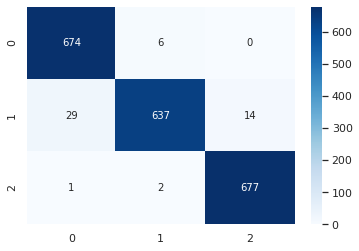

In [ ]:
gc.collect()
libc = ctypes.CDLL("libc.so.6") # clearing cache 
libc.malloc_trim(0)


predictions = []
labels = []
for x, y in img_ds4 :
    predictions = np.concatenate([predictions, np.argmax(model4.predict(x), axis = -1 )])
    labels = np.concatenate([labels, y.numpy()])


cnn = tf.math.confusion_matrix(labels = labels , predictions = predictions )
# print(cnn)
f= np.array(cnn).trace()
print(f/20.40)
print(np.array(cnn).trace())
g = sns.heatmap(cnn , annot = True , cmap = 'Blues' , fmt = 'd')
del predictions, labels, x,y 

97.20588235294119
1983


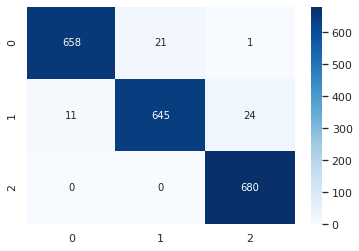

In [ ]:
gc.collect()
libc = ctypes.CDLL("libc.so.6") # clearing cache 
libc.malloc_trim(0)


predictions = []
labels = []
for x, y in img_ds5 :
    predictions = np.concatenate([predictions, np.argmax(model5.predict(x), axis = -1 )])
    labels = np.concatenate([labels, y.numpy()])


cnn = tf.math.confusion_matrix(labels = labels , predictions = predictions )
# print(cnn)
f= np.array(cnn).trace()
print(f/20.40)
print(np.array(cnn).trace())
g = sns.heatmap(cnn , annot = True , cmap = 'Blues' , fmt = 'd')
del predictions, labels, x,y 